In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
# Loading the dataset
bike_rentals = pd.read_csv("bike_rental_hour.csv")

# Initial Exploration of the dataset
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1


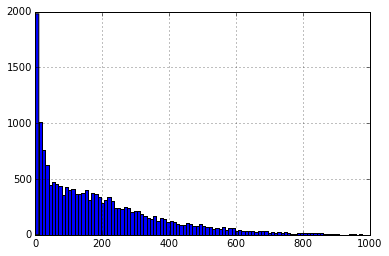

In [58]:
bike_rentals["cnt"].hist(bins = 100)
plt.show()

The distribution is positively skewed.

In [59]:
print("Correlation of cnt with other columns.")
bike_rentals.corr()["cnt"]


Correlation of cnt with other columns.


instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

It appears that the cnt of the bike rentals strongly depended on whether a renter was registered or not, the temperature is also largerly correlated with the renting and also the hours in which it was rental. Lastly, the month and the year also shows a mild positive correlation to the fact of renting the bike. 

In [60]:
def assign_label(hour):
    if hour >= 6 and hour <12:
        return 1
    elif hour >= 12 and hour< 18:
        return 2
    elif hour >=18 and hour< 24:
        return 3
    else:
        return 6
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)


In [61]:

# Split the dataset into train and test sets
bike_rentals = bike_rentals.iloc[np.random.permutation(len(bike_rentals))]

max_split = int(0.8 * bike_rentals.shape[0])
train = bike_rentals[0:max_split]
test =  bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [64]:
# Creating predictor columns

# Following are highly correlated columns with cnt.

columns = ["instant","season","yr","mnth","hr", "temp","atemp","hum"]

## Applying Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score

lr = LinearRegression()
lr.fit(train[columns],train["cnt"])
predictions = lr.predict(test[columns])

error = np.mean((predictions - test["cnt"])**2)
print(error)

20019.3486


The error is skyrocketing. It may be because of the skewness of the rentals.

## Applying Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 5)
tree.fit(train[columns],train["cnt"])
predictions = tree.predict(test[columns])

error = np.mean((predictions - test["cnt"])**2)
print(error)

8441.75137762


There's a good amount of improvement in the error when decision trees are used.

## Applying Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(n_estimators = 200 ,max_depth = 20, min_samples_leaf = 2)
tree.fit(train[columns],train["cnt"])
predictions = tree.predict(test[columns])

error = np.mean((predictions - test["cnt"])**2)
print(error)

6647.67977233


The error is improved a lot but still is large